# ***WBK clients Exploratory Data Analisys***

In [42]:
# imports
import pandas            as pd
import numpy             as np
import statistics        as sts
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px
import plotly.graph_objs as go

## **EDA**

In [43]:
df = pd.read_csv('./WBKClientsRaw.csv')
df.shape

(250, 22)

In [44]:
df.head()

,Cliente,Estado,Sexo,Duracao,HistoricoCredito,Proposito,Valor,Investimento,Emprego,TempoParcelamento,...,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,Adelina Buenaventura,RJ,M,2,Adelina Buenaventura,2,1,5951,2,3.0,...,3,2.0,22,3,1.0,1,4,1,0,0
1,Adelino Gago,RJ,M,3,Adelino Gago,1,2,2096,2,4.0,...,3,3.0,49,3,1.0,1,3,2,0,0
2,Adélio Lisboa,SE,M,4,Adélio Lisboa,2,3,7882,2,4.0,...,4,4.0,45,3,2.0,1,4,2,0,0
3,Adérito Bahía,MA,M,5,Adérito Bahía,3,4,4870,2,3.0,...,3,4.0,53,3,2.0,2,4,2,0,0
4,Adolfo Patrício,PE,M,6,Adolfo Patrício,2,2,9055,1,3.0,...,3,4.0,35,3,2.0,1,3,2,1,0


## **Treating NaN values**

In [45]:
df.isna().any()

# InstallmentTime, Age, ExistingLoan

Cliente                 False
Estado                  False
Sexo                    False
Duracao                 False
HistoricoCredito        False
Proposito               False
Valor                   False
Investimento            False
Emprego                 False
TempoParcelamento        True
EstadoCivil             False
Fiador                  False
ResidenciaDesde         False
Idade                    True
OutrosFinanciamentos    False
Habitacao               False
EmprestimoExistente      True
Profissao               False
Dependentes             False
SocioEmpresa            False
Estrangeiro             False
Status                  False
dtype: bool

### Getting the median of the columns with NaN values

In [46]:
installmenttime_get_median = df['TempoParcelamento']
installmenttime_median = sts.median(installmenttime_get_median)

age_get_median = df['Idade']
age_median = sts.median(age_get_median)

existingloan_get_median = df['EmprestimoExistente']
existingloan_median = sts.median(existingloan_get_median)

print(f'{installmenttime_median = }')
print(f'{age_median = }')
print(f'{existingloan_median = }')

installmenttime_median = 3.0
age_median = 2.0
existingloan_median = 1.0


### Replacing all the NaN with the median of it's column

In [47]:
df['TempoParcelamento'].fillna(installmenttime_median, inplace = True)
df['Idade'].fillna(age_median, inplace = True)
df['EmprestimoExistente'].fillna(existingloan_median, inplace = True)

In [48]:
# ALL NAN VALUES TREATED
df.isna().any().any()

False

### **UPDATING THE CSV FILE**

In [49]:
# df.to_csv('..\\scripts\\WBKClientsTreated.csv', index = False)

### Visualizing unique values of each column

In [50]:
columns = df.columns

for column in columns:
    uniques, quant = np.unique(df[column], return_counts = True)
    print(f'{column}\nUNIQUES: {uniques}\nQUANT:   {quant}\n')

Cliente
UNIQUES: ['Adelina Buenaventura' 'Adelino Gago' 'Adolfo Patrício'
 'Adriana Guedelha' 'Adélio Lisboa' 'Adérito Bahía' 'Aida Dorneles'
 'Alarico Quinterno' 'Alberto Cezimbra' 'Alberto Monsanto' 'Albino Canela'
 'Alceste Varanda' 'Alcides Carvalhais' 'Aldo Martins' 'Alexandra Tabares'
 'Alfredo Cotrim' 'Almeno Figueira' 'Alvito Peralta' 'Amadeu Martinho'
 'Amélia Estévez' 'Ana Homem' 'Ana Peseiro' 'Anacleto Garrau'
 'Anacleto Guterres' 'Andreia Carvalhal' 'Anita Beserra' 'Anna Beça'
 'Anna Carvajal' 'Anselmo Dinis' 'Antero Milheiro' 'Antão Corte-Real'
 'Antónia Canhão' 'António Lousado' 'Antônio Leiria' 'Antônio Sobral'
 'Aníbal Bastos' 'Apuã Ourique' 'Arachane Matos' 'Arcidres Murici'
 'Armindo Castilhos' 'Armindo Moreira' 'Artur Macedo' 'Artur Peña'
 'Aurélio Barrios' 'Bartolomeu Vila-Chã' 'Basilio Soares' 'Belmira Colaço'
 'Belmiro Marroquim' 'Bento Quintão' 'Berengária Iglesias'
 'Bernardete Querino' 'Bernardete Tavera' 'Bernardete Águeda'
 'Brenda Serralheiro' 'Brites Morale

## ***Using new DATA***

In [52]:
# Numeric Data
df_ND = pd.read_csv('..\\scripts\\WBKClientsTreated.csv')
df_ND.shape

(250, 22)

In [53]:
# Non Numeric Data
df_NND = pd.read_csv('..\\scripts\\WBKCnonNumeric.csv')
df_NND.shape

(250, 22)

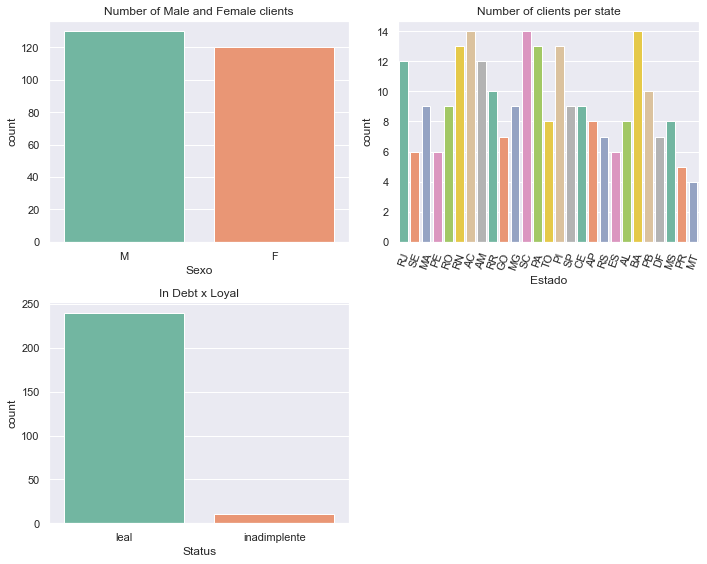

In [55]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.countplot(data = df_NND, x = 'Sexo', palette = 'Set2');
plt.title('Number of Male and Female clients')

plt.subplot(2, 2, 2)
sns.countplot(data = df_NND, x = 'Estado', palette = 'Set2');
plt.title('Number of clients per state')
plt.xticks(rotation = 70)

plt.subplot(2, 2, 3)
sns.countplot(data = df_NND, x = 'Status', palette = 'Set2');
plt.title('In Debt x Loyal')

plt.tight_layout()
plt.show()